# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all columns

In [3]:
df = pd.read_excel('geo_comment.xlsx')

In [4]:
len(df)

70382

In [5]:
len(df[df.multiplier>1])

448

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
X=df[['x','y']].drop_duplicates()

In [8]:
X.shape


(2542, 2)

Будем прогонять через DBSCAN разные комбинации epslons и min_samples. Запишем те у которых больше 20 кластеров полуачется и меншье 400 объектов вылетауют в шум

In [9]:
epslons_=[]
min_samples_=[]
for num in range(2,50,+1):
    for epsi in range(5,100,+2):
        epsi=epsi/10
        kms_per_radian = 6371.0088
        epsilon = epsi/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X[cluster_labels == n] for n in range(num_clusters)])
        n_noise_ = list(cluster_labels).count(-1)
        if num_clusters>20 and n_noise_<400:
            epslons_.append(epsi)
            min_samples_.append(num)
            print('Number of clusters: {0},epsilon:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,epsi,num,n_noise_))

Number of clusters: 267,epsilon:0.5.min_samples: 2. noise: 399 
Number of clusters: 169,epsilon:0.7.min_samples: 2. noise: 196 
Number of clusters: 109,epsilon:0.9.min_samples: 2. noise: 105 
Number of clusters: 63,epsilon:1.1.min_samples: 2. noise: 63 
Number of clusters: 35,epsilon:1.3.min_samples: 2. noise: 34 
Number of clusters: 23,epsilon:1.5.min_samples: 2. noise: 28 
Number of clusters: 110,epsilon:0.7.min_samples: 3. noise: 314 
Number of clusters: 77,epsilon:0.9.min_samples: 3. noise: 169 
Number of clusters: 47,epsilon:1.1.min_samples: 3. noise: 95 
Number of clusters: 27,epsilon:1.3.min_samples: 3. noise: 50 
Number of clusters: 62,epsilon:0.9.min_samples: 4. noise: 265 
Number of clusters: 45,epsilon:1.1.min_samples: 4. noise: 139 
Number of clusters: 26,epsilon:1.3.min_samples: 4. noise: 68 
Number of clusters: 52,epsilon:0.9.min_samples: 5. noise: 365 
Number of clusters: 39,epsilon:1.1.min_samples: 5. noise: 207 
Number of clusters: 26,epsilon:1.3.min_samples: 5. noise:

Нарисуем то, что получилось

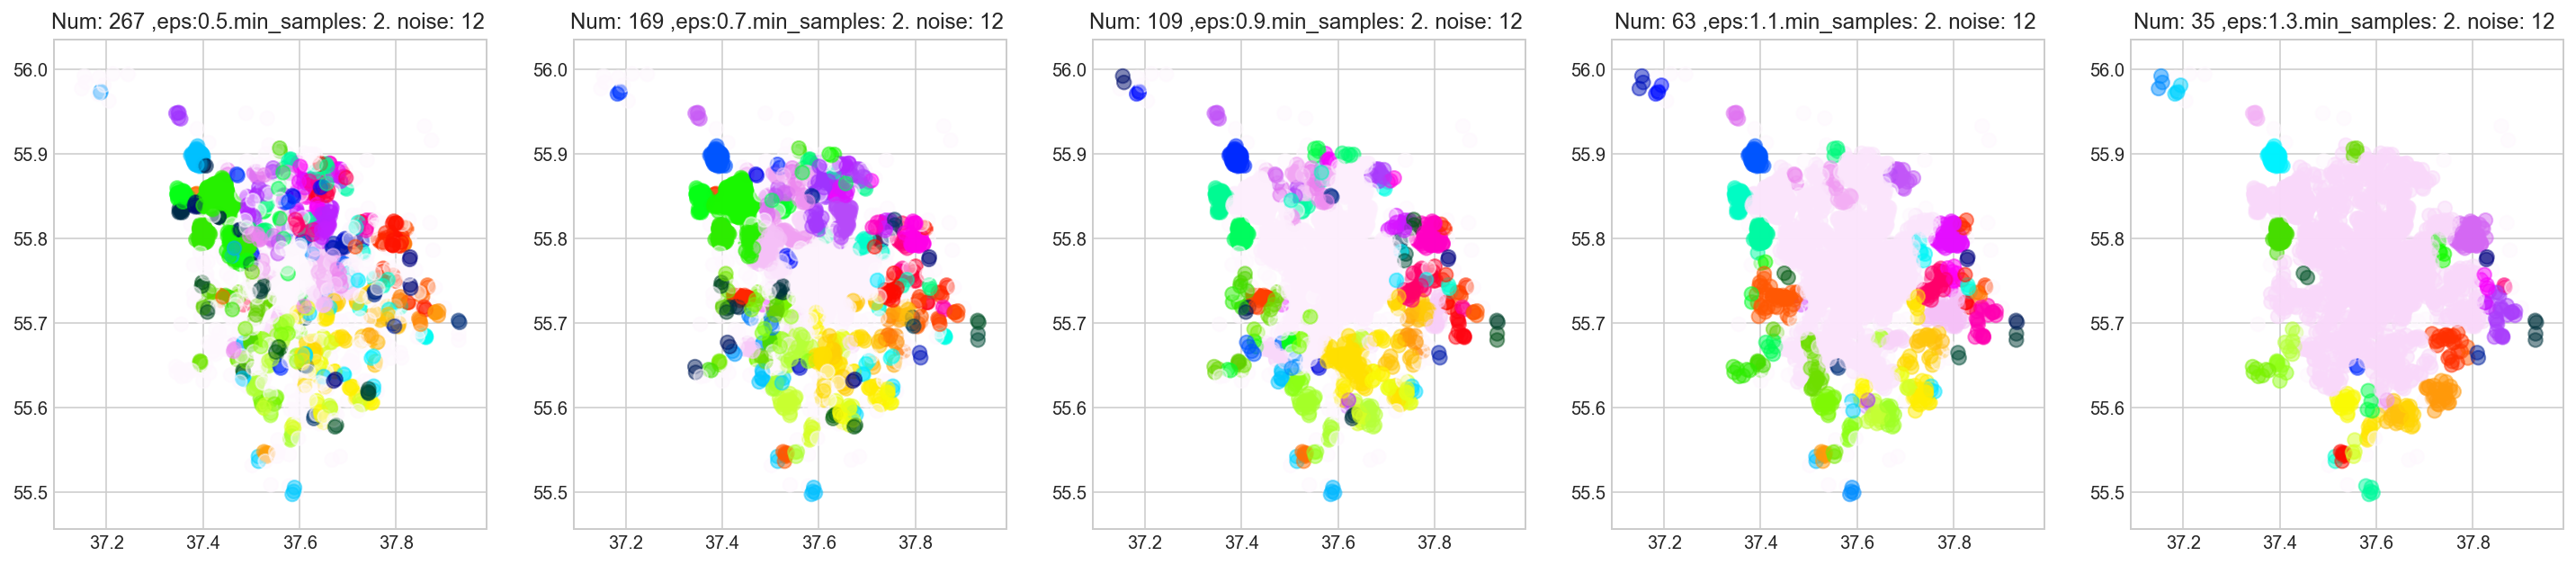

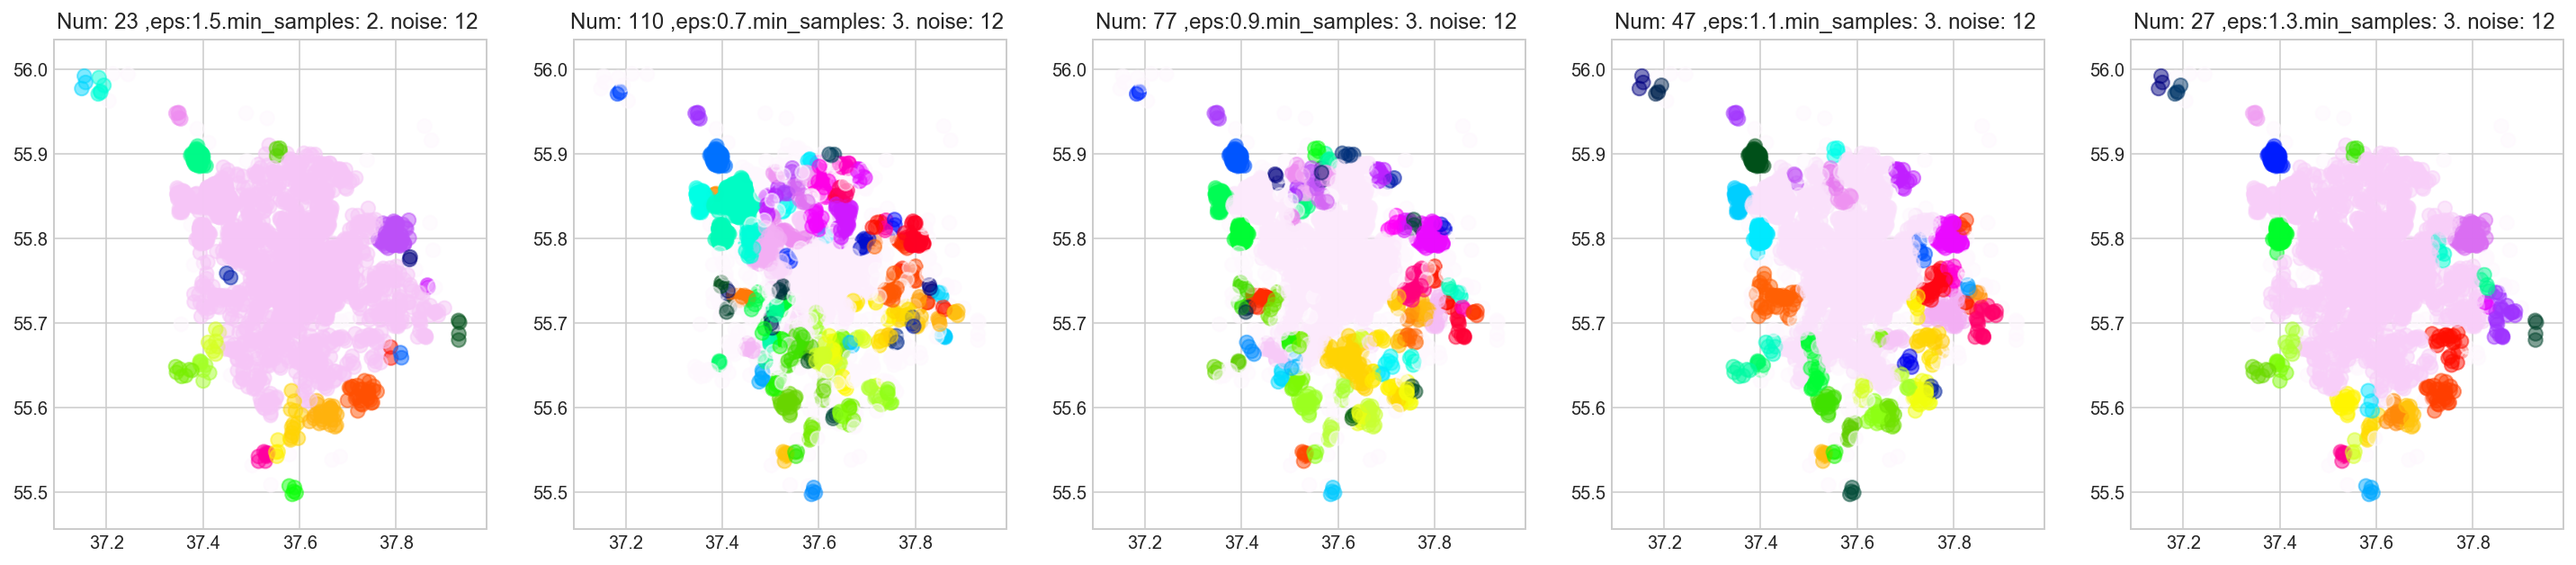

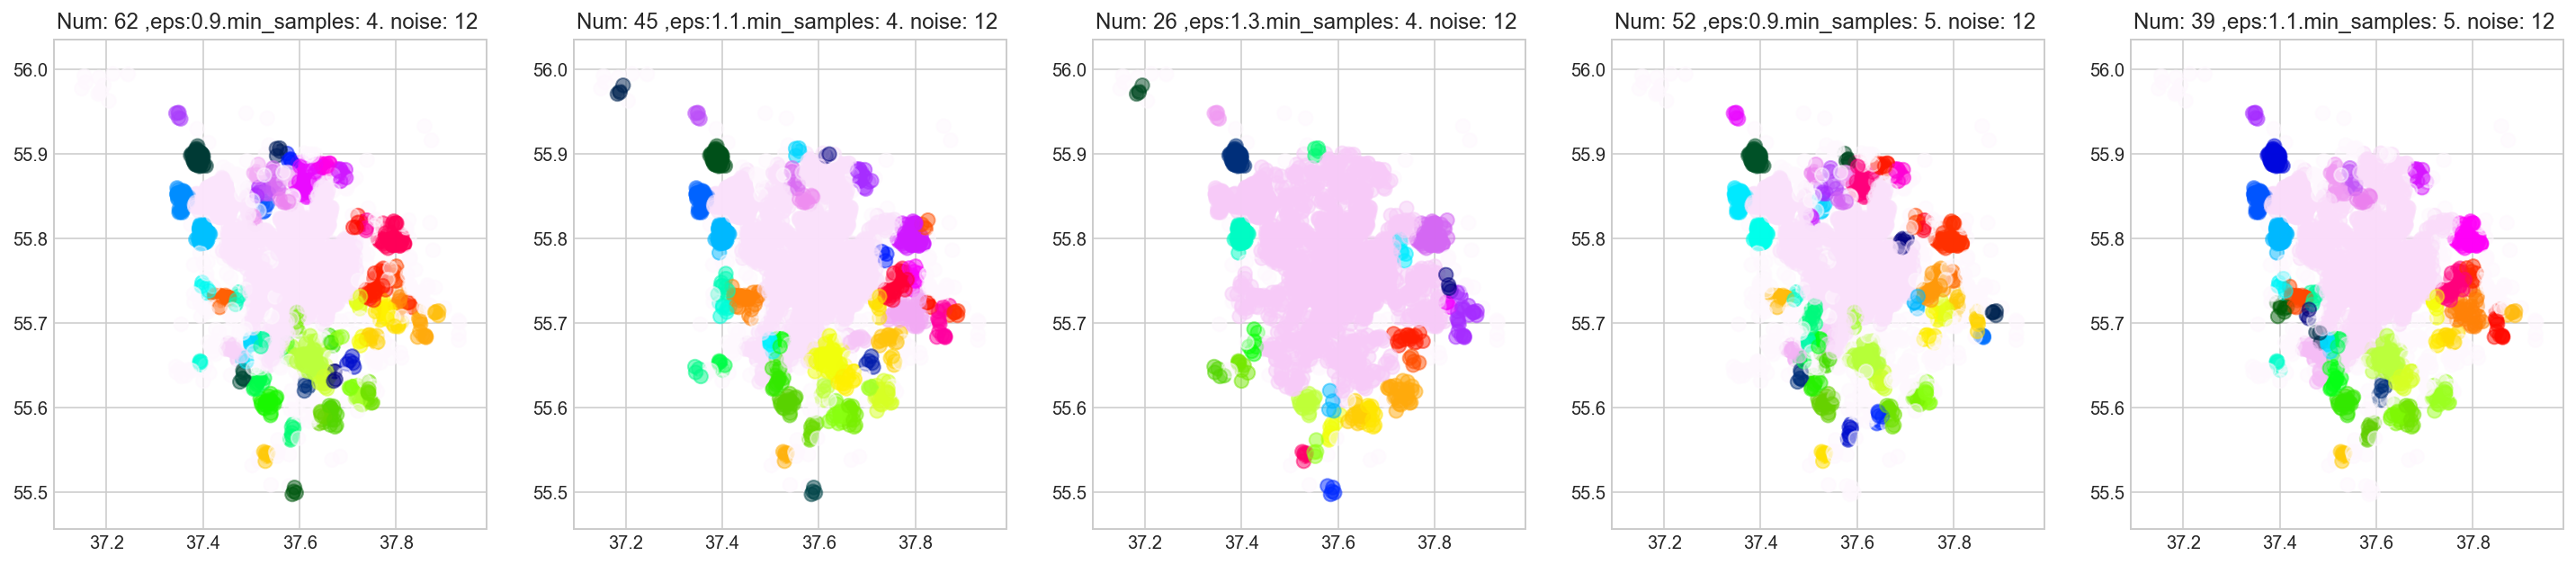

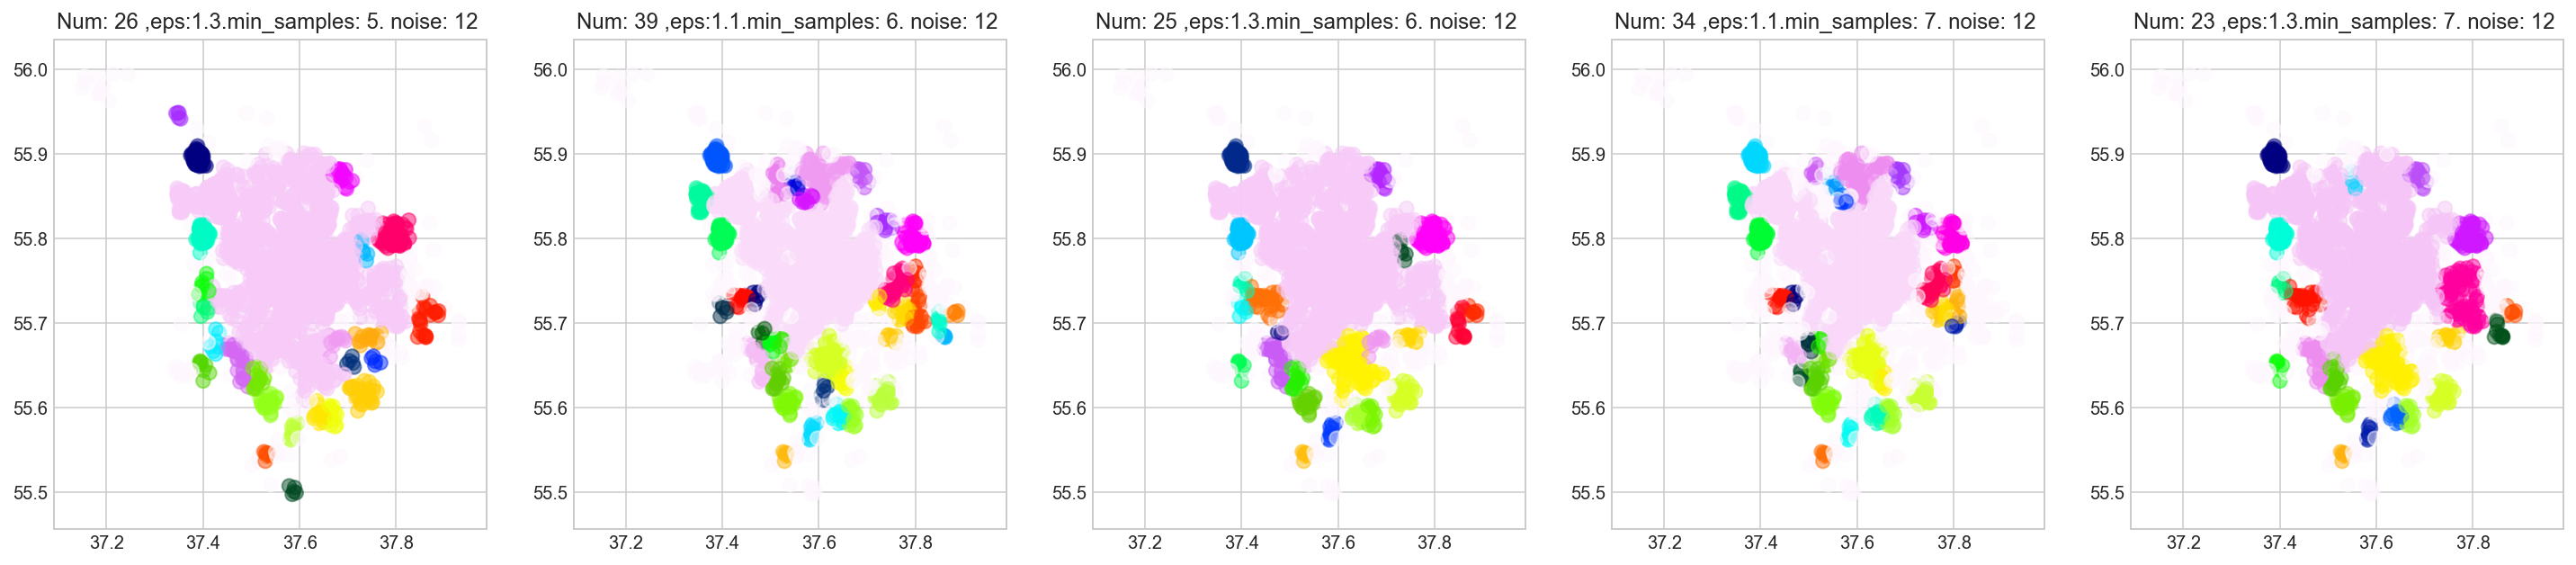

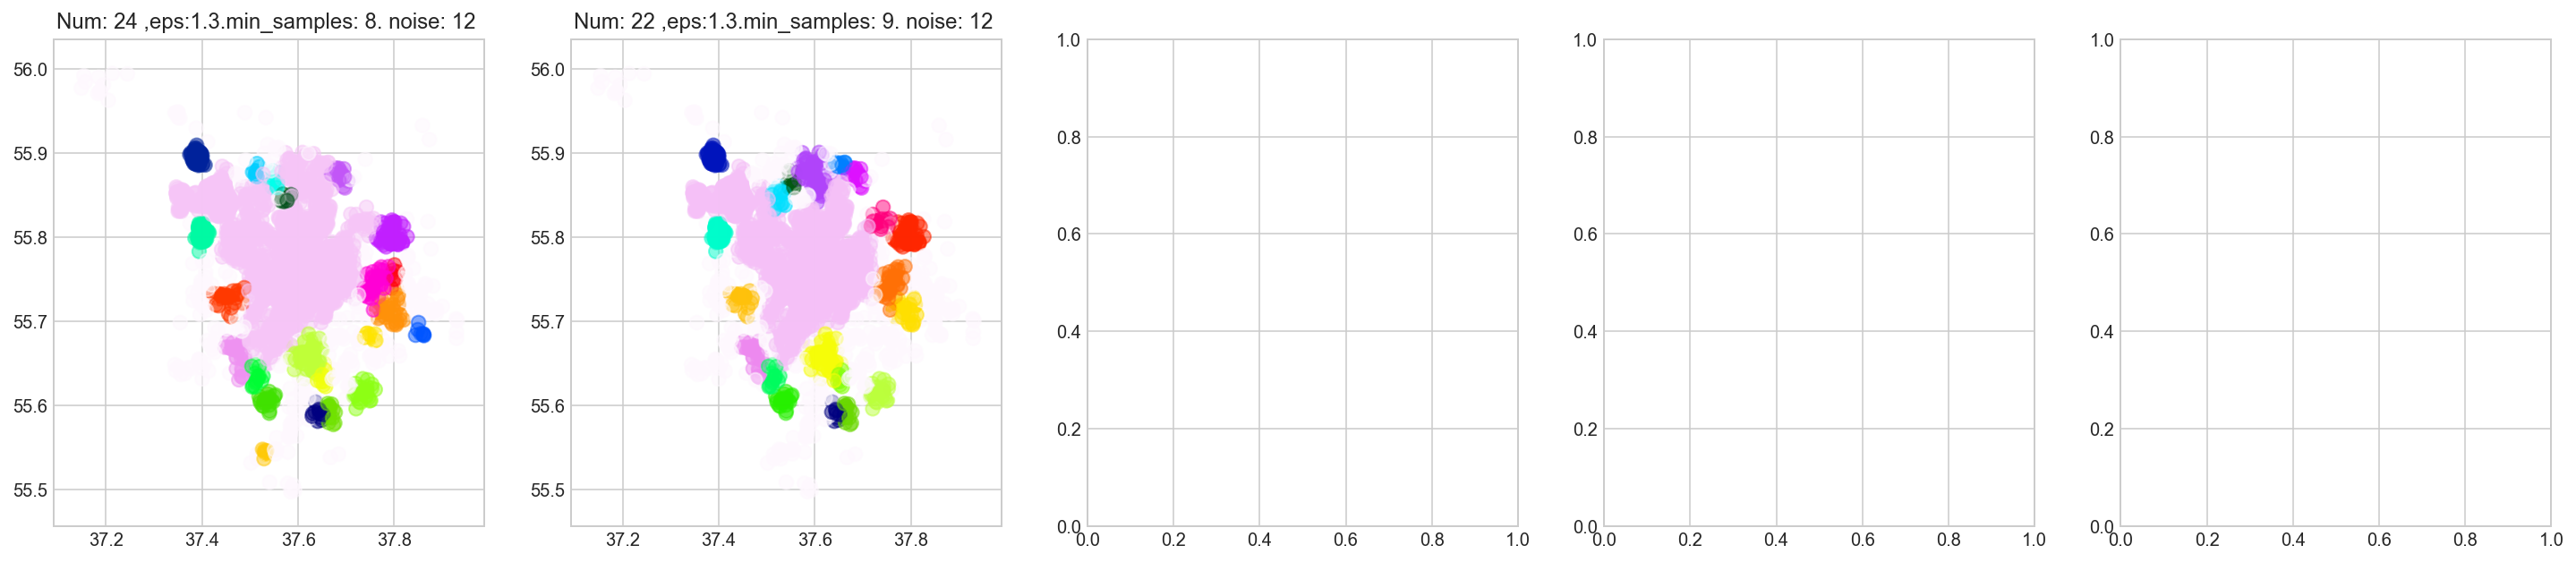

In [10]:
#fig, axes = plt.subplots(5, 5, figsize=(25, 5))
import math


for x in range(0,25, +math.ceil(len(epslons_)/5)):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    for ax, eps,num in zip(axes[:5], epslons_[x:x+5],min_samples_[x:x+5]):
        kms_per_radian = 6371.0088
        epsilon = (eps)/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X[cluster_labels == n] for n in range(num_clusters)])
        ax.scatter(X['x'], X['y'], c=cluster_labels,cmap='gist_ncar_r', s=60,alpha=0.5)
        ax.set_title('Num: {0} ,eps:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,eps,num,n_noise_) )


    


In [ ]:
Выберем самый первый варинат. Посмотрим на него поближе

Text(0.5,1,'Num: 267 ,eps:0.5.min_samples: 2. noise: 9 ')

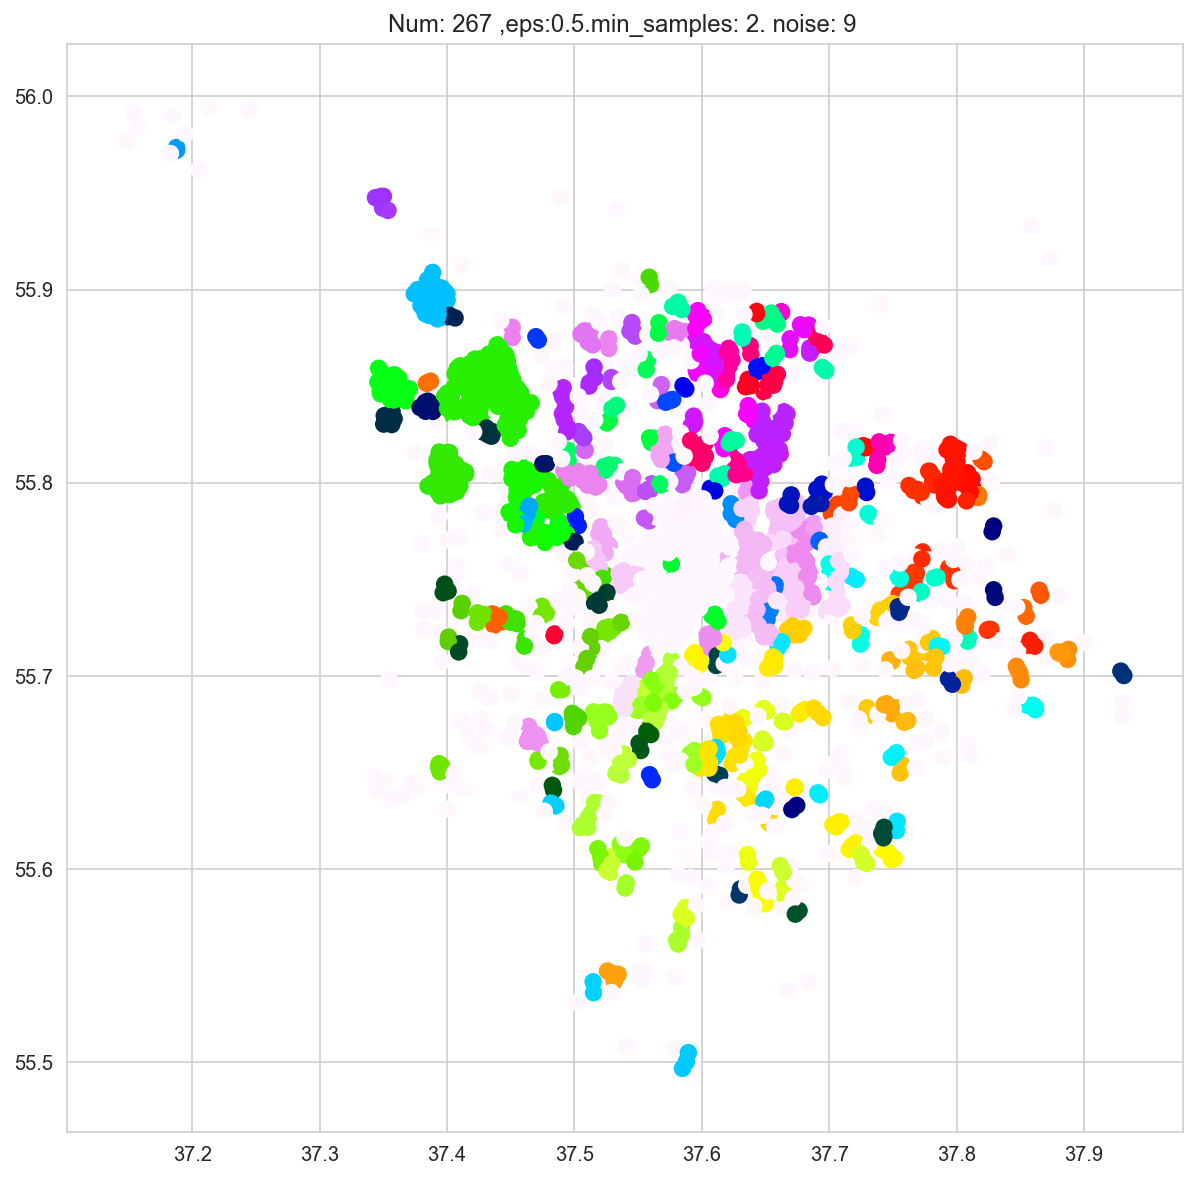

In [409]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
num=2
eps=0.5
kms_per_radian = 6371.0088
epsilon = (eps)/ kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([X[cluster_labels == n] for n in range(num_clusters)])
axes.scatter(X['x'], X['y'], c=cluster_labels,cmap='gist_ncar_r', s=60)
axes.set_title('Num: {0} ,eps:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,eps,num,n_noise_) )

In [11]:
df.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [12]:
df.comment_class.value_counts()

-1    58552
 1    11830
Name: comment_class, dtype: int64

In [13]:
#Суммируем голоса по каждому дому
temp=df.groupby(['x','y'])['comment_class'].sum().reset_index()

In [14]:
 # будем считать, как будто ,если сумма положительная, то дома за
X_za=temp[temp.comment_class>0][['x','y']].drop_duplicates()
X_protiv=temp[temp.comment_class<=0][['x','y']].drop_duplicates()

 Будем подбирать для ЗА

In [15]:
epslons_za=[]
min_samples_za=[]
for num in range(2,50,+1):
    for epsi in range(5,100,+2):
        epsi=epsi/10
        kms_per_radian = 6371.0088
        epsilon = epsi/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X_za))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X_za[cluster_labels == n] for n in range(num_clusters)])
        n_noise_ = list(cluster_labels).count(-1)
        if num_clusters>20 and n_noise_<400:
            epslons_za.append(epsi)
            min_samples_za.append(num)
            print('Number of clusters: {0},epsilon:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,epsi,num,n_noise_))

Number of clusters: 62,epsilon:0.5.min_samples: 2. noise: 214 
Number of clusters: 65,epsilon:0.7.min_samples: 2. noise: 147 
Number of clusters: 60,epsilon:0.9.min_samples: 2. noise: 107 
Number of clusters: 49,epsilon:1.1.min_samples: 2. noise: 79 
Number of clusters: 45,epsilon:1.3.min_samples: 2. noise: 56 
Number of clusters: 40,epsilon:1.5.min_samples: 2. noise: 45 
Number of clusters: 41,epsilon:1.7.min_samples: 2. noise: 35 
Number of clusters: 31,epsilon:1.9.min_samples: 2. noise: 31 
Number of clusters: 27,epsilon:2.1.min_samples: 2. noise: 22 
Number of clusters: 31,epsilon:0.5.min_samples: 3. noise: 276 
Number of clusters: 34,epsilon:0.7.min_samples: 3. noise: 209 
Number of clusters: 30,epsilon:0.9.min_samples: 3. noise: 167 
Number of clusters: 28,epsilon:1.1.min_samples: 3. noise: 121 
Number of clusters: 29,epsilon:1.3.min_samples: 3. noise: 88 
Number of clusters: 27,epsilon:1.5.min_samples: 3. noise: 71 
Number of clusters: 26,epsilon:1.7.min_samples: 3. noise: 65 
N

Будем побирать против

In [16]:
epslons_protiv=[]
min_samples_protiv=[]
for num in range(2,50,+1):
    for epsi in range(5,100,+2):
        epsi=epsi/10
        kms_per_radian = 6371.0088
        epsilon = epsi/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X_protiv))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X_protiv[cluster_labels == n] for n in range(num_clusters)])
        n_noise_ = list(cluster_labels).count(-1)
        if num_clusters>20 and n_noise_<400:
            epslons_protiv.append(epsi)
            min_samples_protiv.append(num)
            print('Number of clusters: {0},epsilon:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,epsi,num,n_noise_))

Number of clusters: 171,epsilon:0.7.min_samples: 2. noise: 223 
Number of clusters: 119,epsilon:0.9.min_samples: 2. noise: 134 
Number of clusters: 78,epsilon:1.1.min_samples: 2. noise: 73 
Number of clusters: 48,epsilon:1.3.min_samples: 2. noise: 32 
Number of clusters: 33,epsilon:1.5.min_samples: 2. noise: 27 
Number of clusters: 111,epsilon:0.7.min_samples: 3. noise: 343 
Number of clusters: 81,epsilon:0.9.min_samples: 3. noise: 210 
Number of clusters: 54,epsilon:1.1.min_samples: 3. noise: 121 
Number of clusters: 37,epsilon:1.3.min_samples: 3. noise: 54 
Number of clusters: 26,epsilon:1.5.min_samples: 3. noise: 41 
Number of clusters: 62,epsilon:0.9.min_samples: 4. noise: 311 
Number of clusters: 53,epsilon:1.1.min_samples: 4. noise: 172 
Number of clusters: 34,epsilon:1.3.min_samples: 4. noise: 81 
Number of clusters: 25,epsilon:1.5.min_samples: 4. noise: 58 
Number of clusters: 43,epsilon:1.1.min_samples: 5. noise: 244 
Number of clusters: 33,epsilon:1.3.min_samples: 5. noise: 1

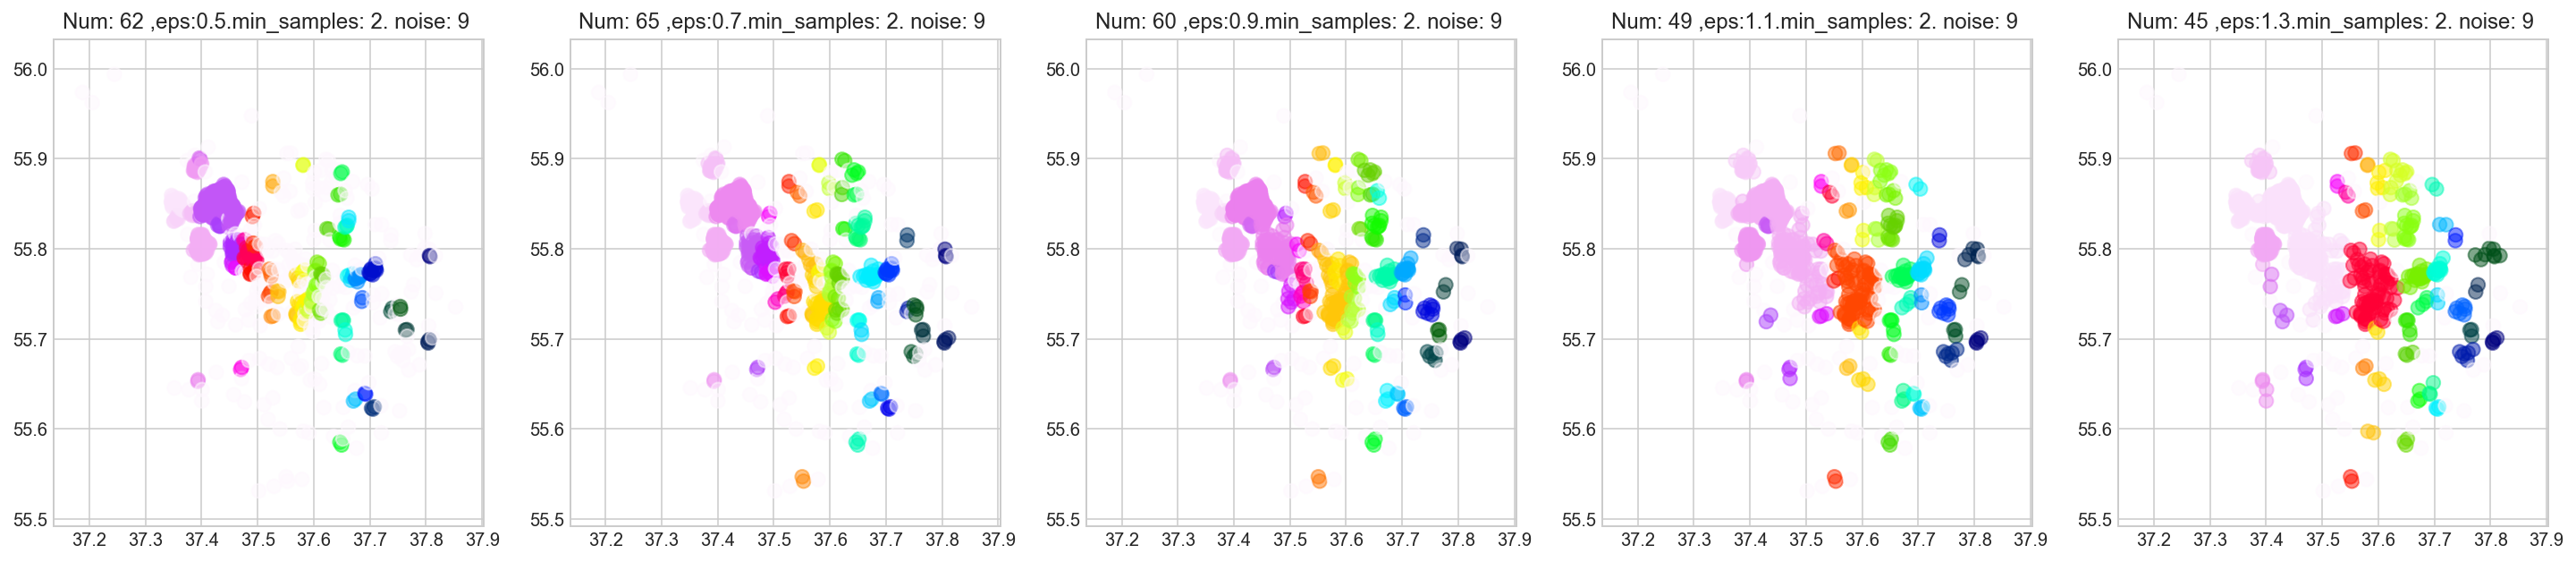

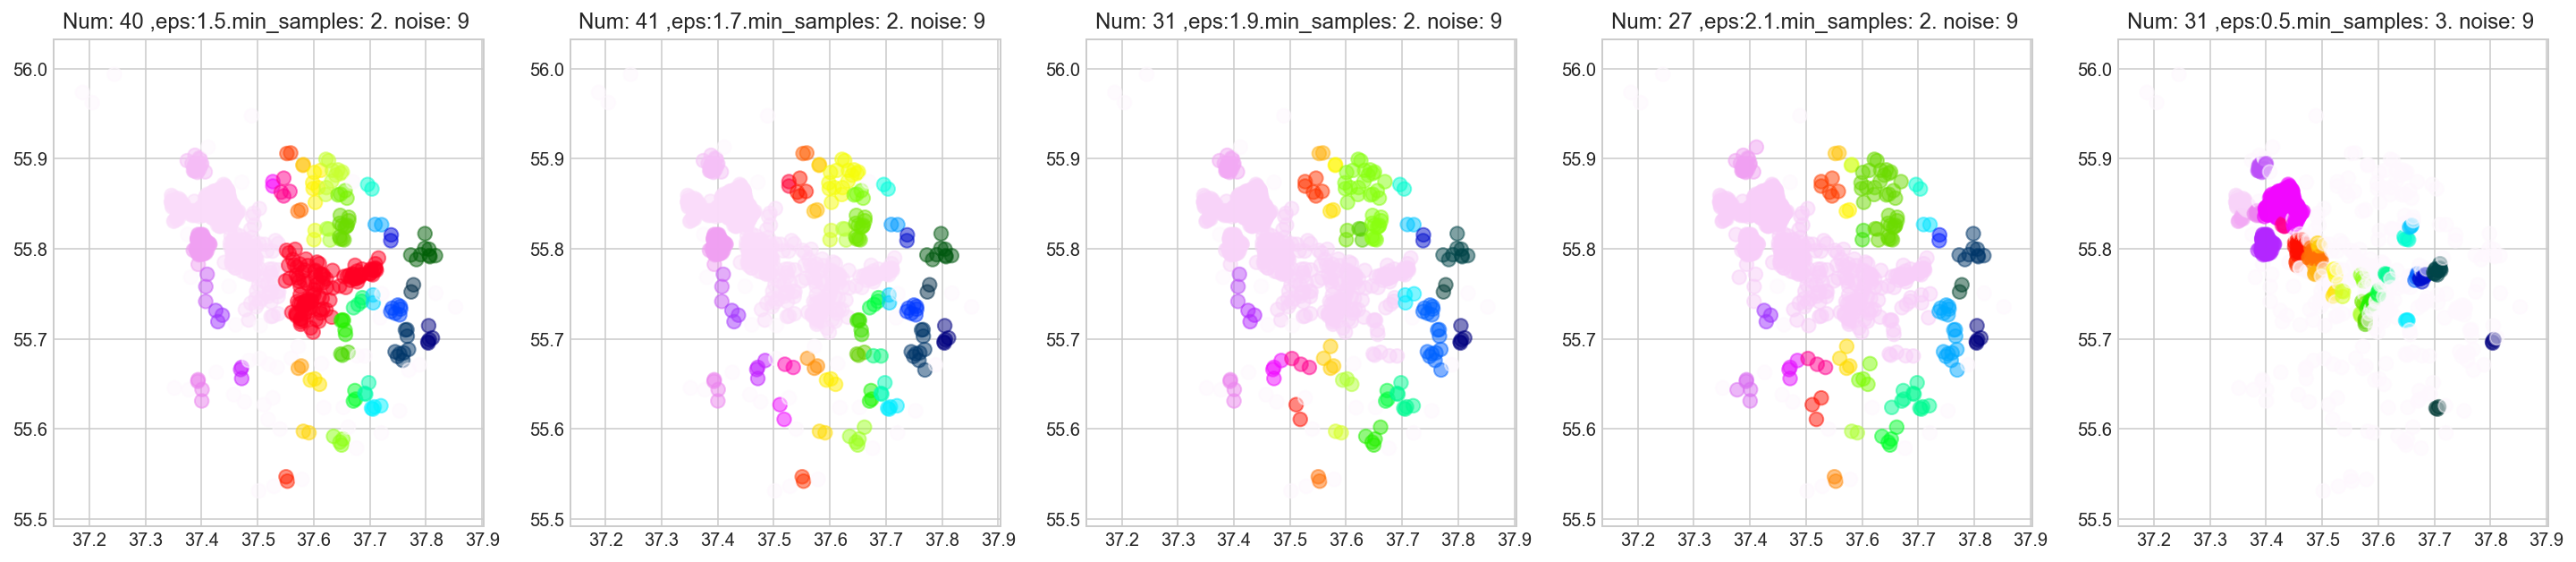

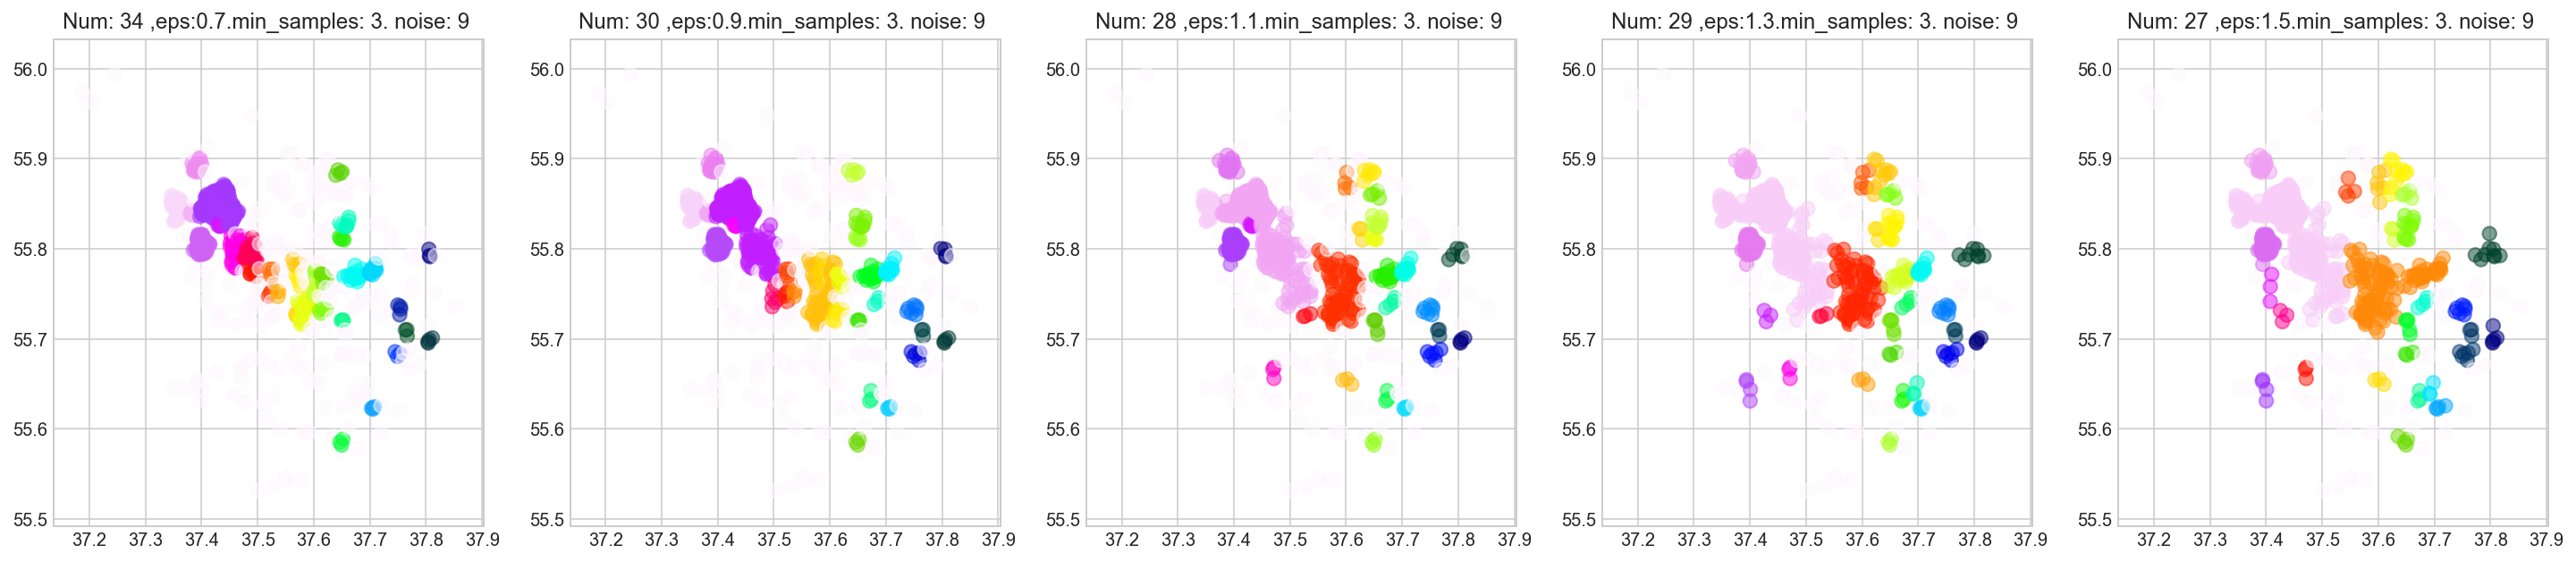

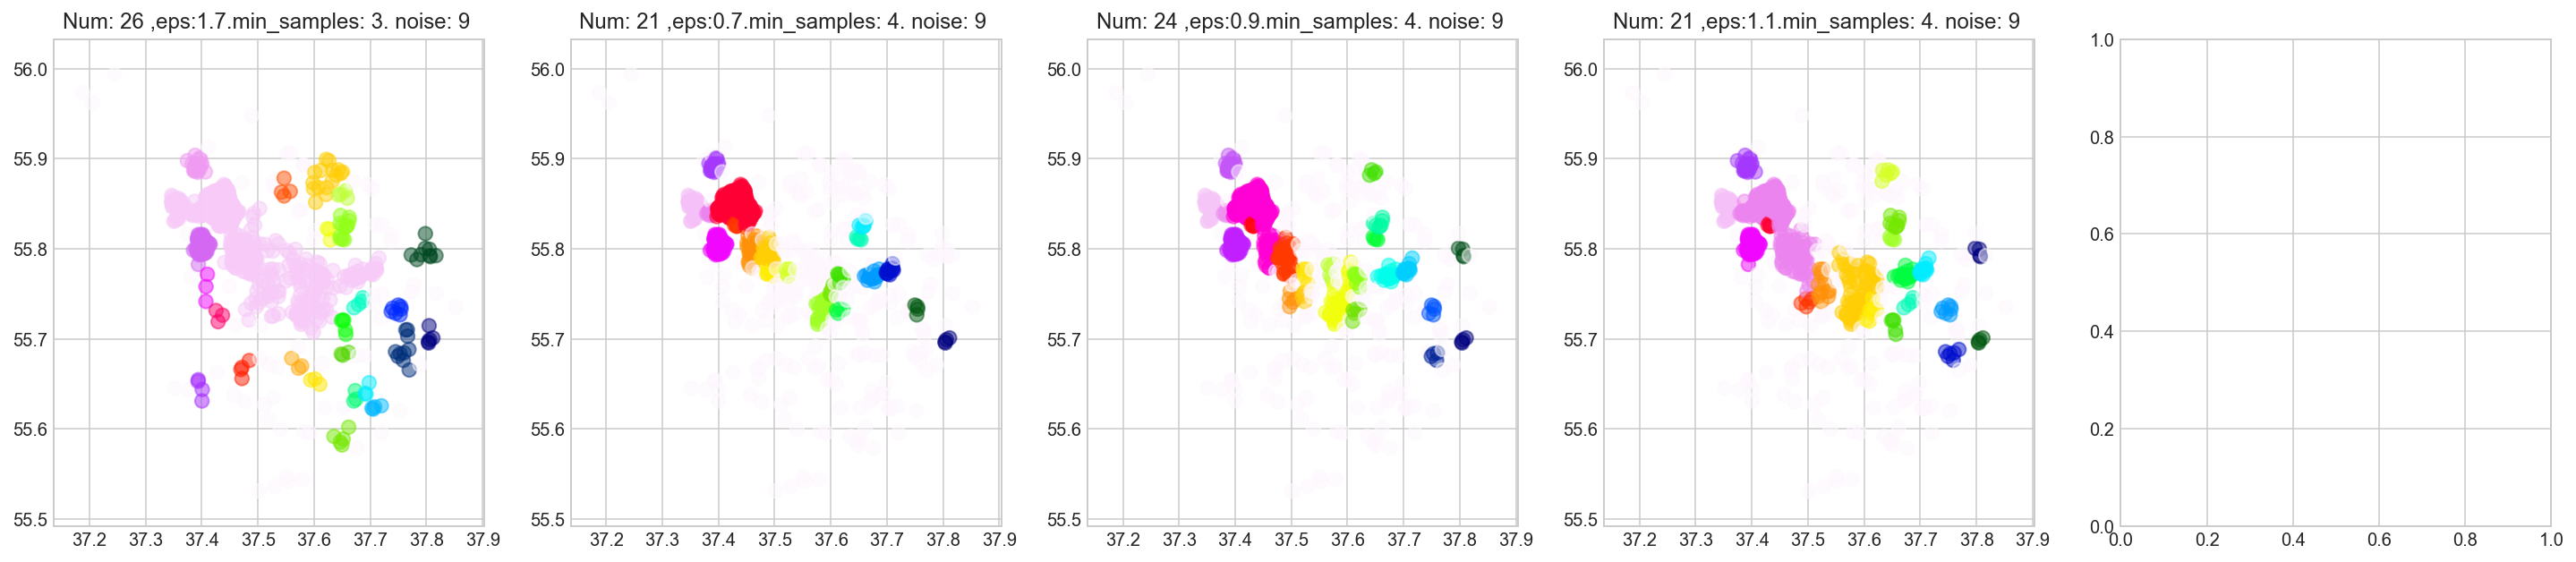

In [17]:
import math
   #Нарисуем за

for x in range(0,20, +math.ceil(len(epslons_)/5)):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    for ax, eps,num in zip(axes[:5], epslons_za[x:x+5],min_samples_za[x:x+5]):
        kms_per_radian = 6371.0088
        epsilon = (eps)/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X_za))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X_za[cluster_labels == n] for n in range(num_clusters)])
        ax.scatter(X_za['x'], X_za['y'], c=cluster_labels,cmap='gist_ncar_r', s=60,alpha=0.5)
        ax.set_title('Num: {0} ,eps:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,eps,num,n_noise_) )



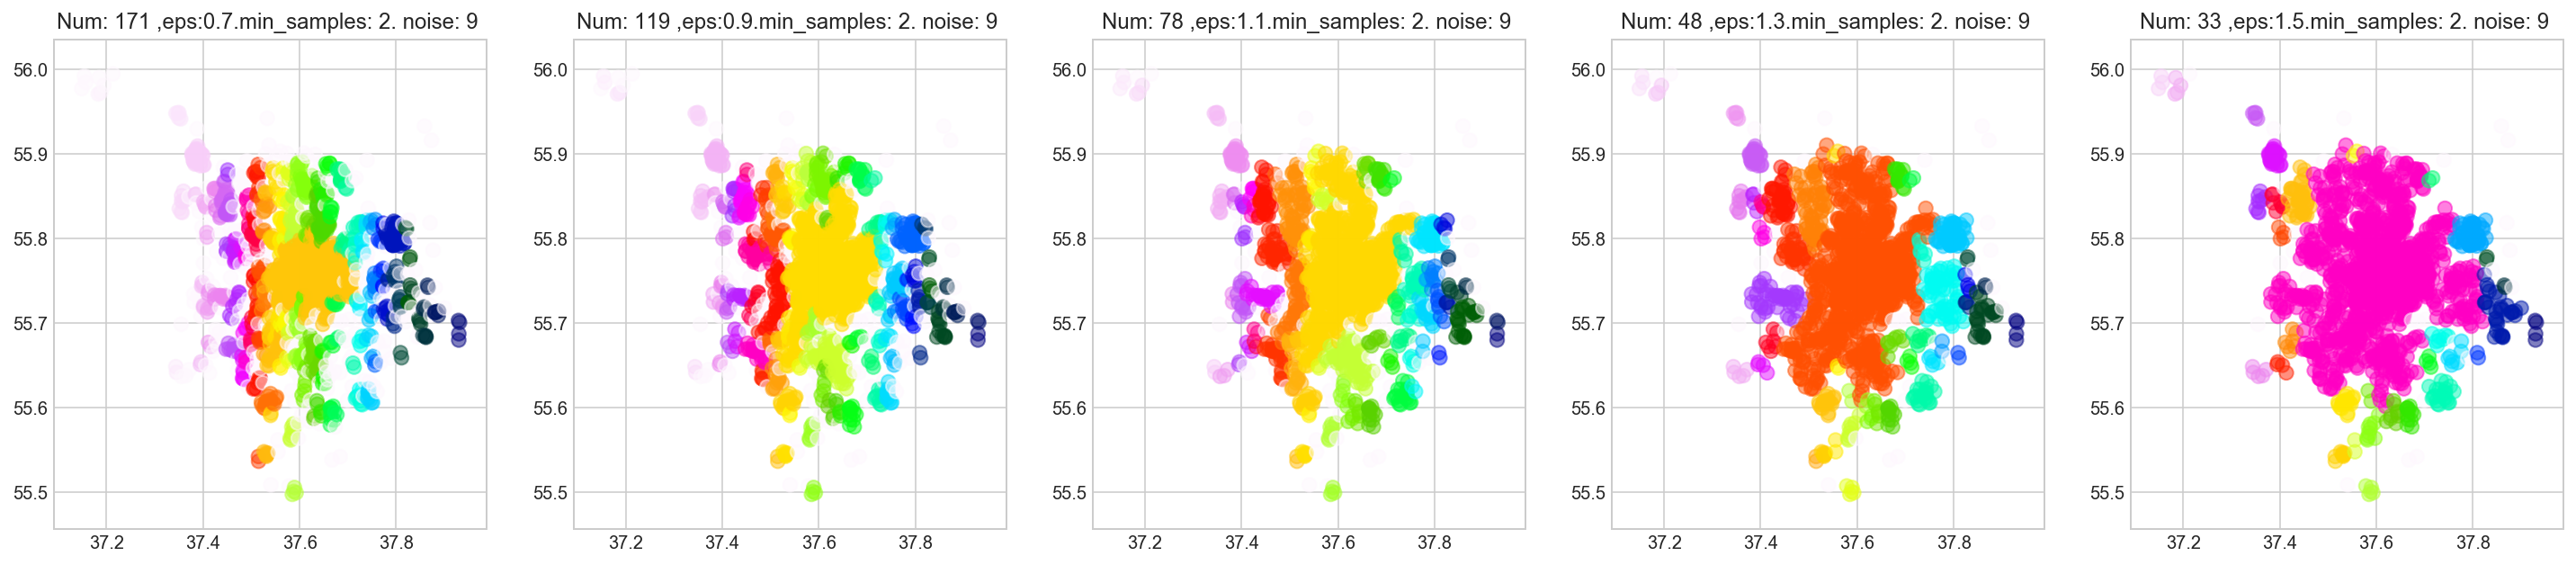

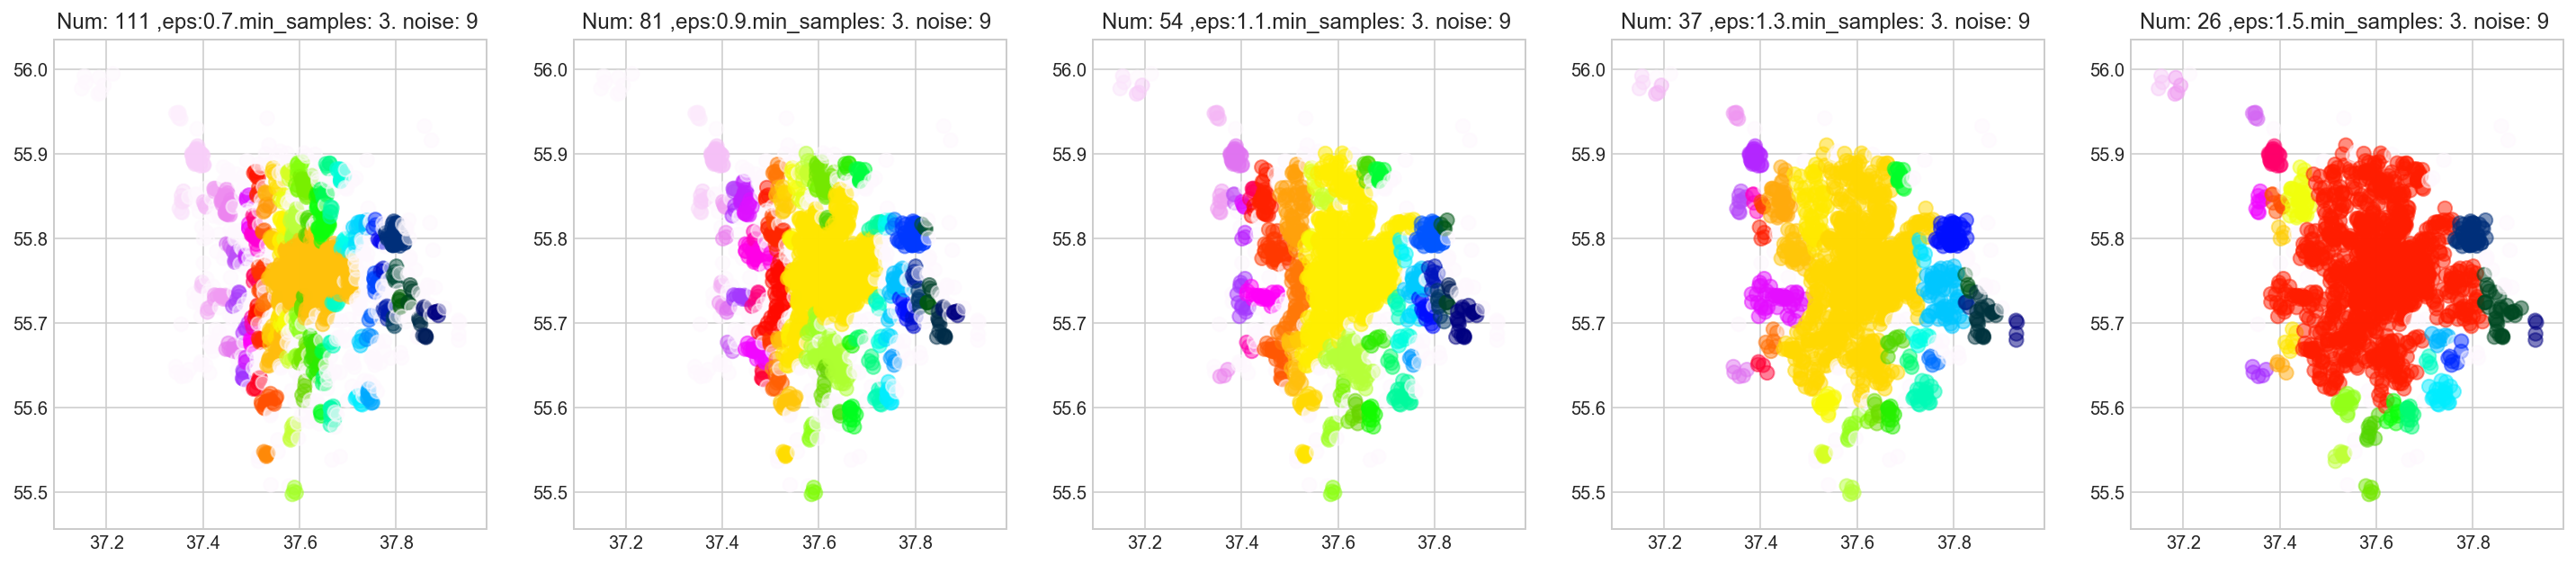

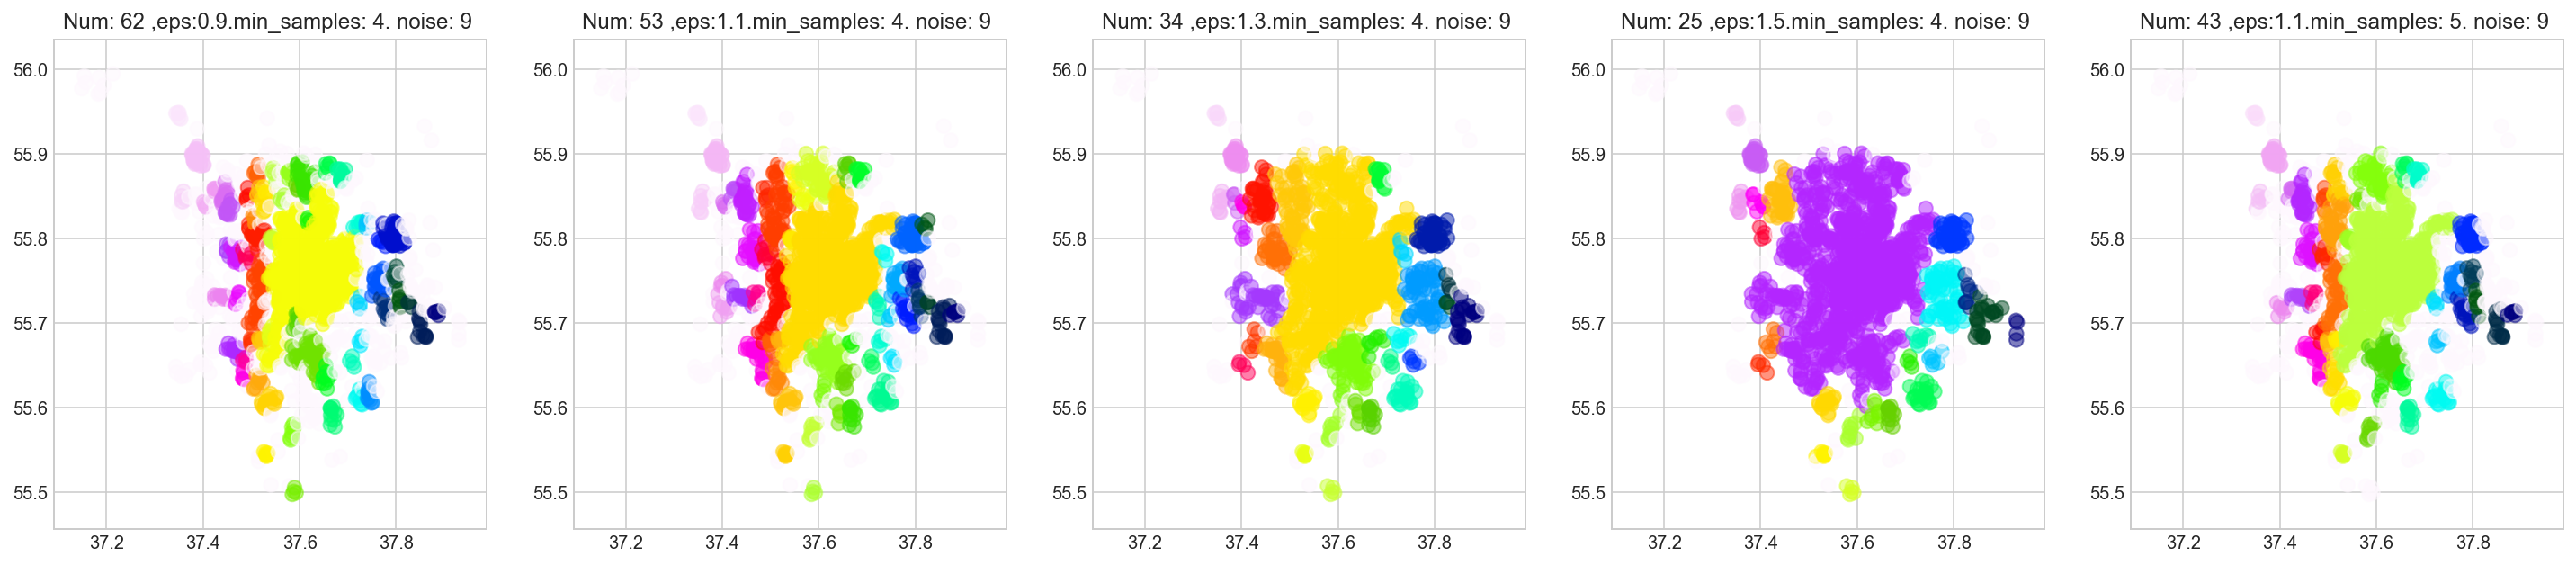

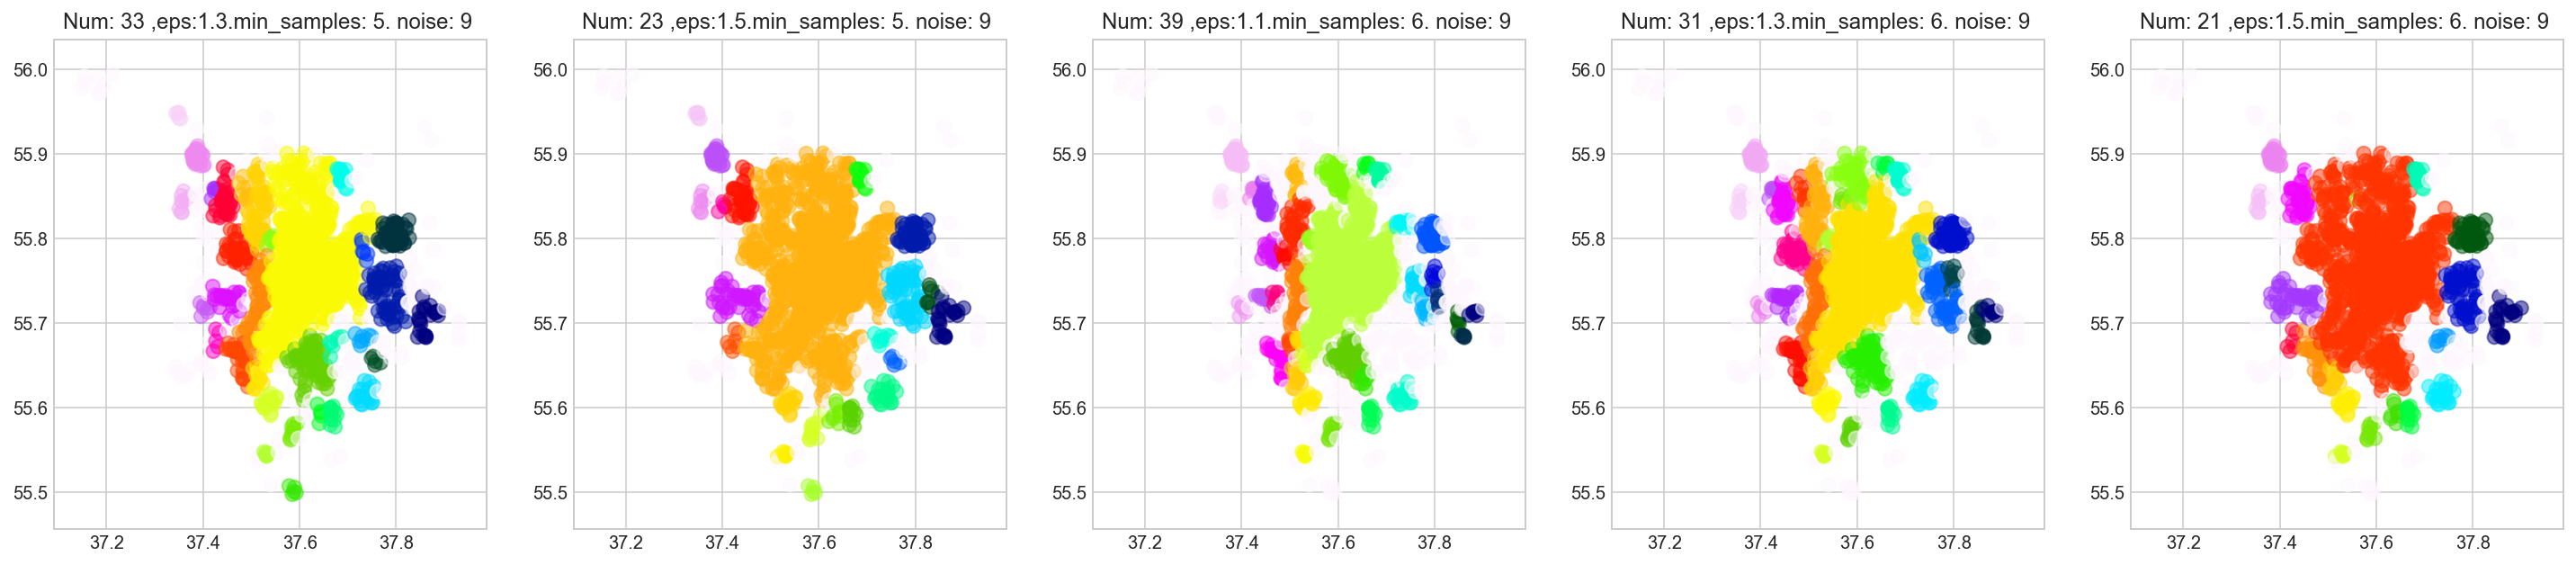

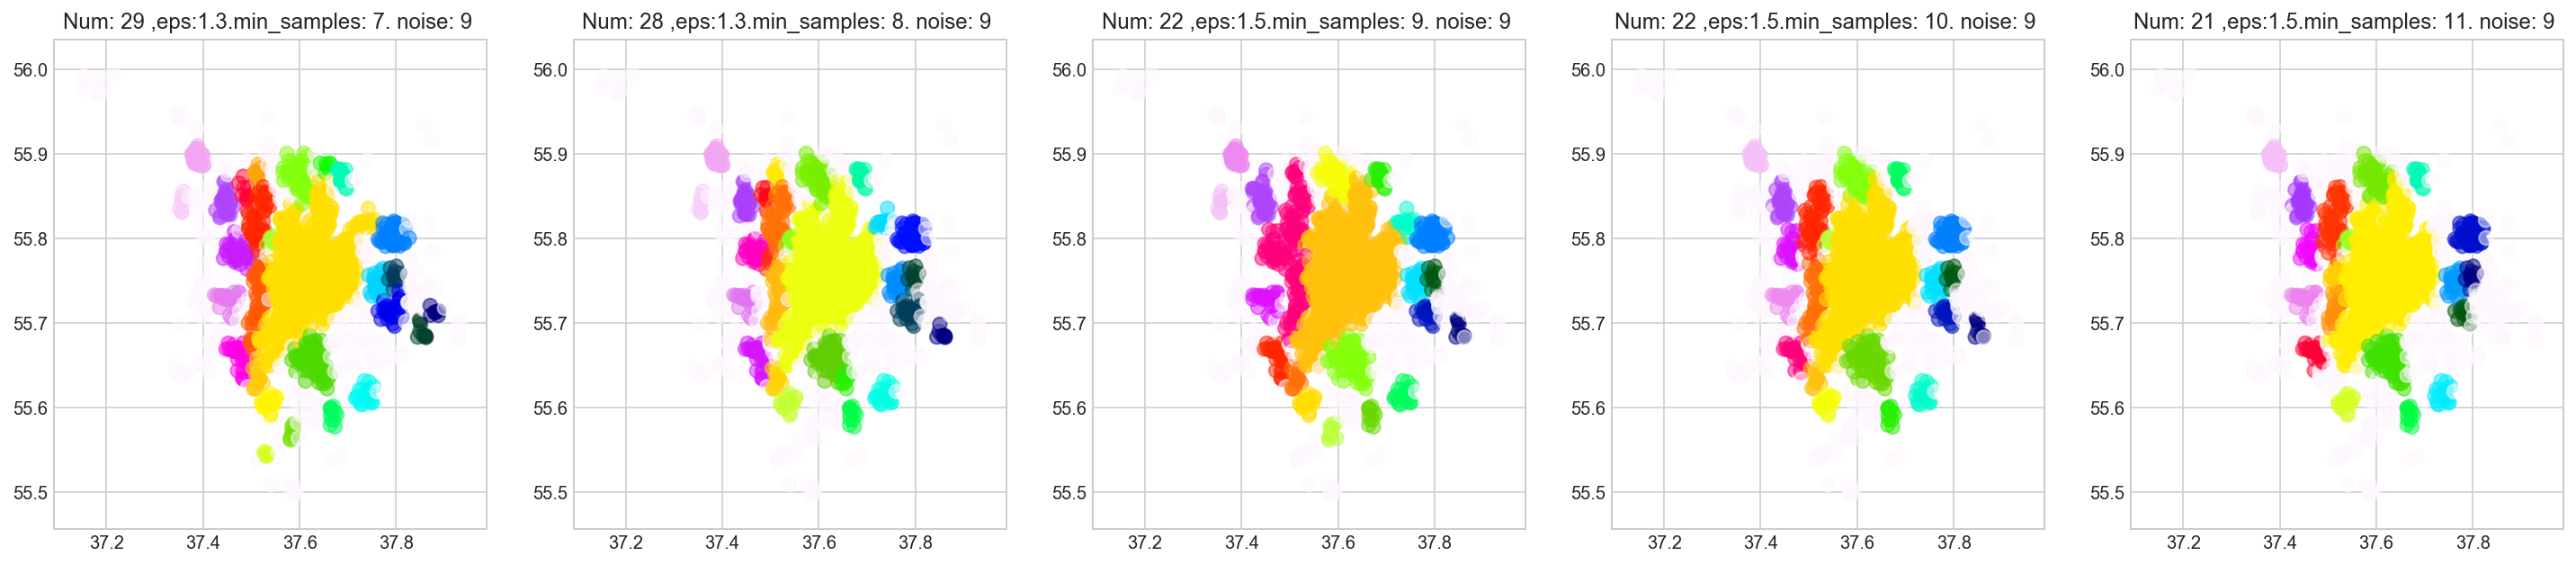

In [18]:
#Нарисуем против
for x in range(0,25, +math.ceil(len(epslons_)/5)):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    for ax, eps,num in zip(axes[:5], epslons_protiv[x:x+5],min_samples_protiv[x:x+5]):
        kms_per_radian = 6371.0088
        epsilon = (eps)/ kms_per_radian
        db = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit(np.radians(X_protiv))
        cluster_labels = db.labels_
        num_clusters = len(set(cluster_labels))
        clusters = pd.Series([X_protiv[cluster_labels == n] for n in range(num_clusters)])
        ax.scatter(X_protiv['x'], X_protiv['y'], c=cluster_labels,cmap='gist_ncar_r', s=60,alpha=0.5)
        ax.set_title('Num: {0} ,eps:{1}.min_samples: {2}. noise: {3} '.format(num_clusters,eps,num,n_noise_) )



## 3. Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

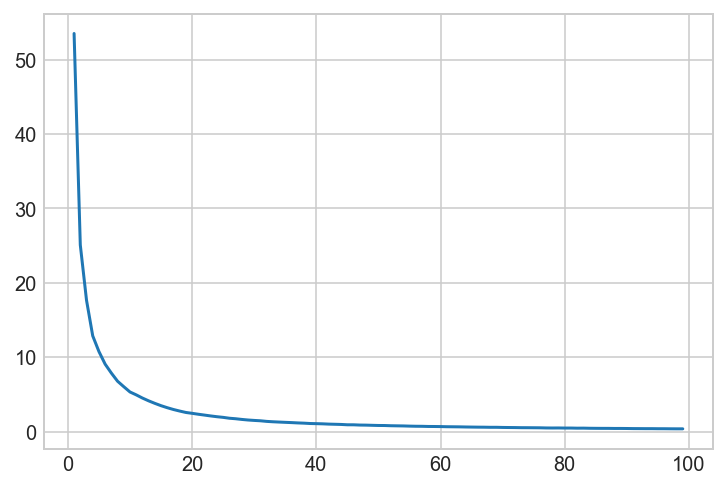

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

k_inertia = []
ks = range(1,100)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)

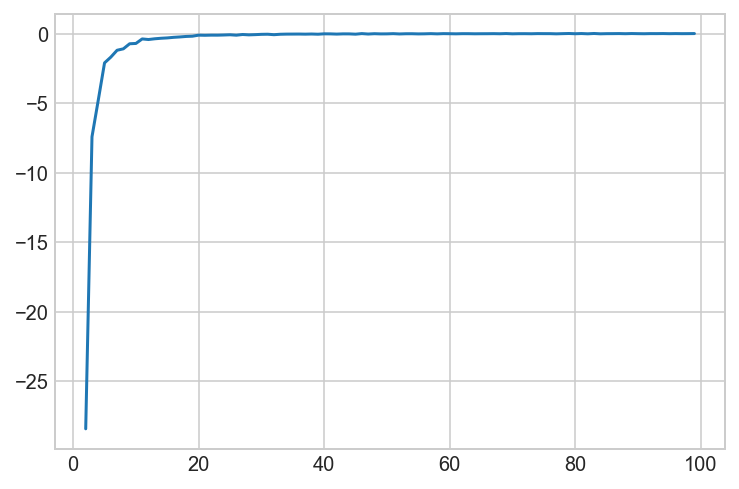

In [20]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [21]:
diff_r = diff[1:] / diff[:-1]

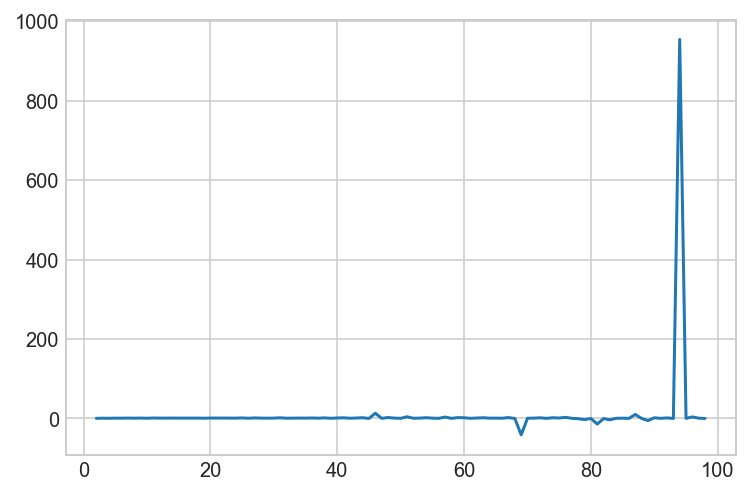

In [22]:
plt.plot(ks[1:-1], diff_r)

In [23]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

69

Нассчитали 71 кластер

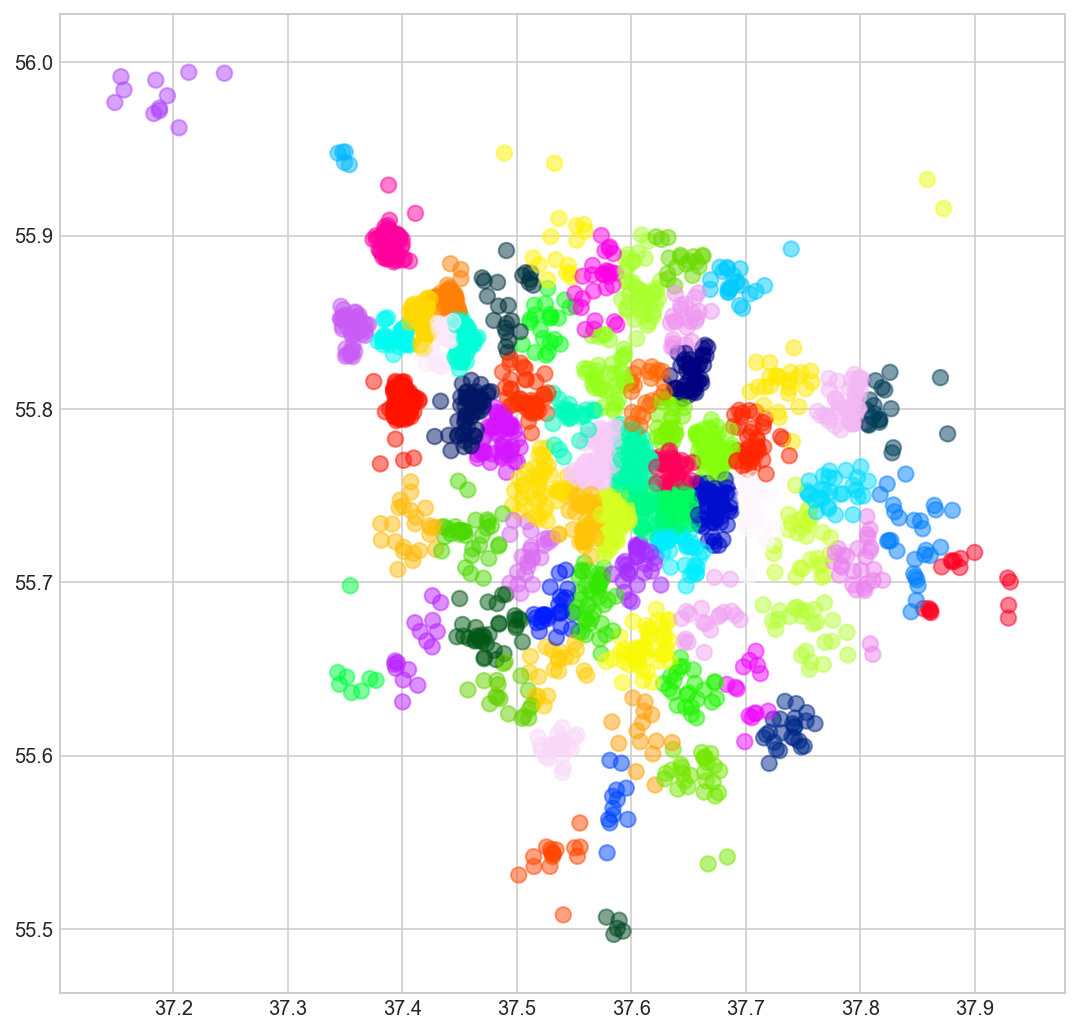

In [24]:
fig, axes = plt.subplots(1, figsize=(9, 9))


    # кластеризуем и выводим картинку
clf_kmeans = KMeans(n_clusters=71)
clusters = clf_kmeans.fit_predict(X)
axes.scatter(X['x'], X['y'], c=clusters,cmap='gist_ncar_r', s=60,alpha=0.5)

Но вообще из графика видна что и 20 уже норм

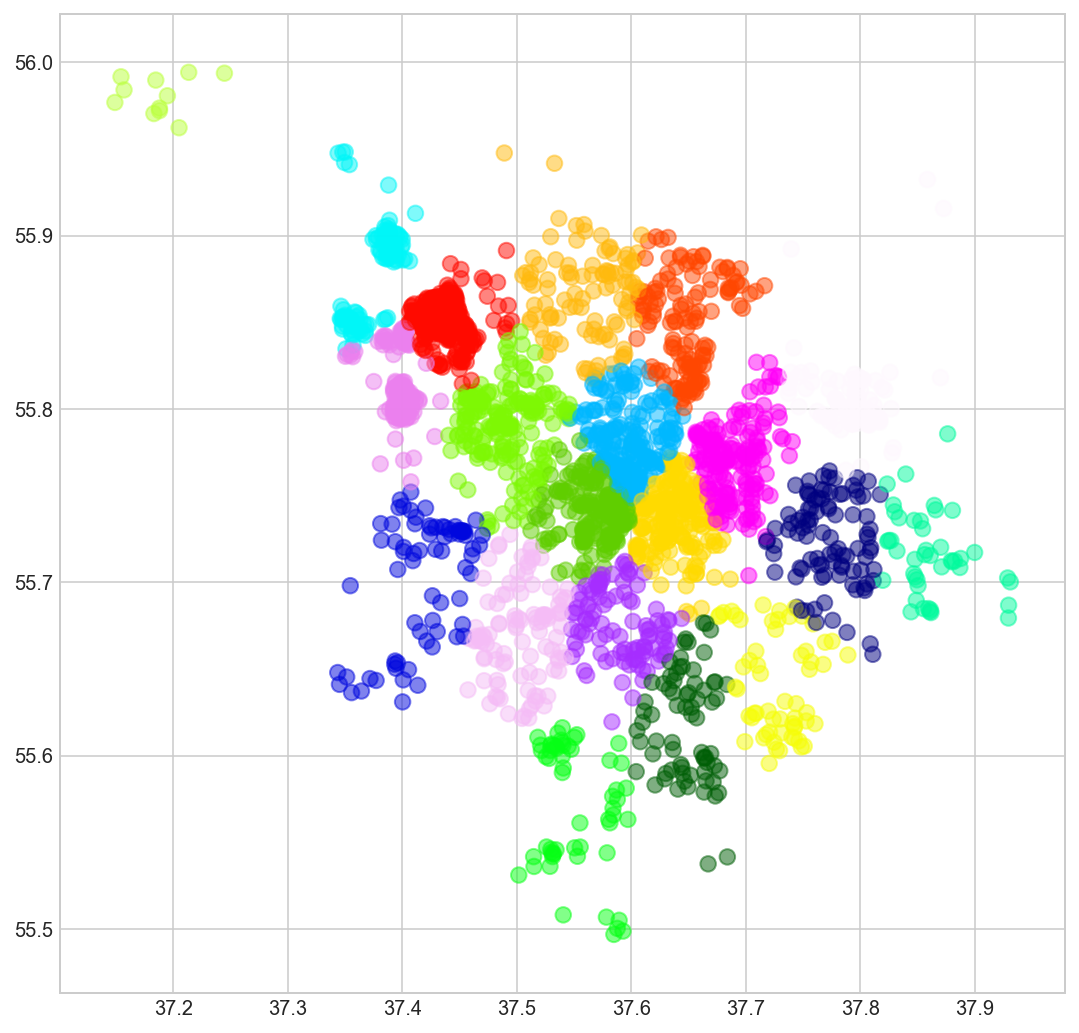

In [25]:
fig, axes = plt.subplots(1, figsize=(9, 9))


    # кластеризуем и выводим картинку
clf_kmeans = KMeans(n_clusters=20)
clusters = clf_kmeans.fit_predict(X)
axes.scatter(X['x'], X['y'], c=clusters,cmap='gist_ncar_r', s=60,alpha=0.5)

## 4) найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [26]:
df.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [27]:
 # Посчитаем общее количетво голосов с учтеом мультипликатора
df['voices']=abs(df['comment_class'])*df['multiplier']

In [28]:
 # Сгруппируем их по домам
temp=df.groupby(['x','y'])['voices'].sum().reset_index()

In [29]:
# Присодеиним наименование кластеров
temp2=temp.join(pd.DataFrame(cluster_labels))
temp2.rename(columns={0:'cluster_labels'}, inplace=True)

In [30]:
# посчитаем количесство коментов в каждом кластере
temp3=temp2.groupby(['cluster_labels'])['voices'].sum().reset_index()
temp4=temp2.merge(temp3, left_on='cluster_labels', right_on='cluster_labels', how='left')
temp4.rename(columns={'voices_y':'summa'}, inplace=True)

In [31]:
# Посчитаем кол-во домов в каждом кластере, и нормальзуем активность голосования
temp5=temp2.groupby(['cluster_labels'])['voices'].count().reset_index()
temp4=temp4.merge(temp5, left_on='cluster_labels', right_on='cluster_labels', how='left')
temp4.rename(columns={'voices':'kolvo'}, inplace=True)
temp4['naolmalizov_altivnost']=temp4['summa']/temp4['kolvo']

In [32]:
temp4.naolmalizov_altivnost.mean()

44.8798334324805

In [33]:
#Для простоты создаим признак если активность больше средней то ставим 1
temp4['srednya_aktivnost']=temp4.naolmalizov_altivnost.apply(lambda x: 0 if x<=temp4.naolmalizov_altivnost.mean() else 1  )


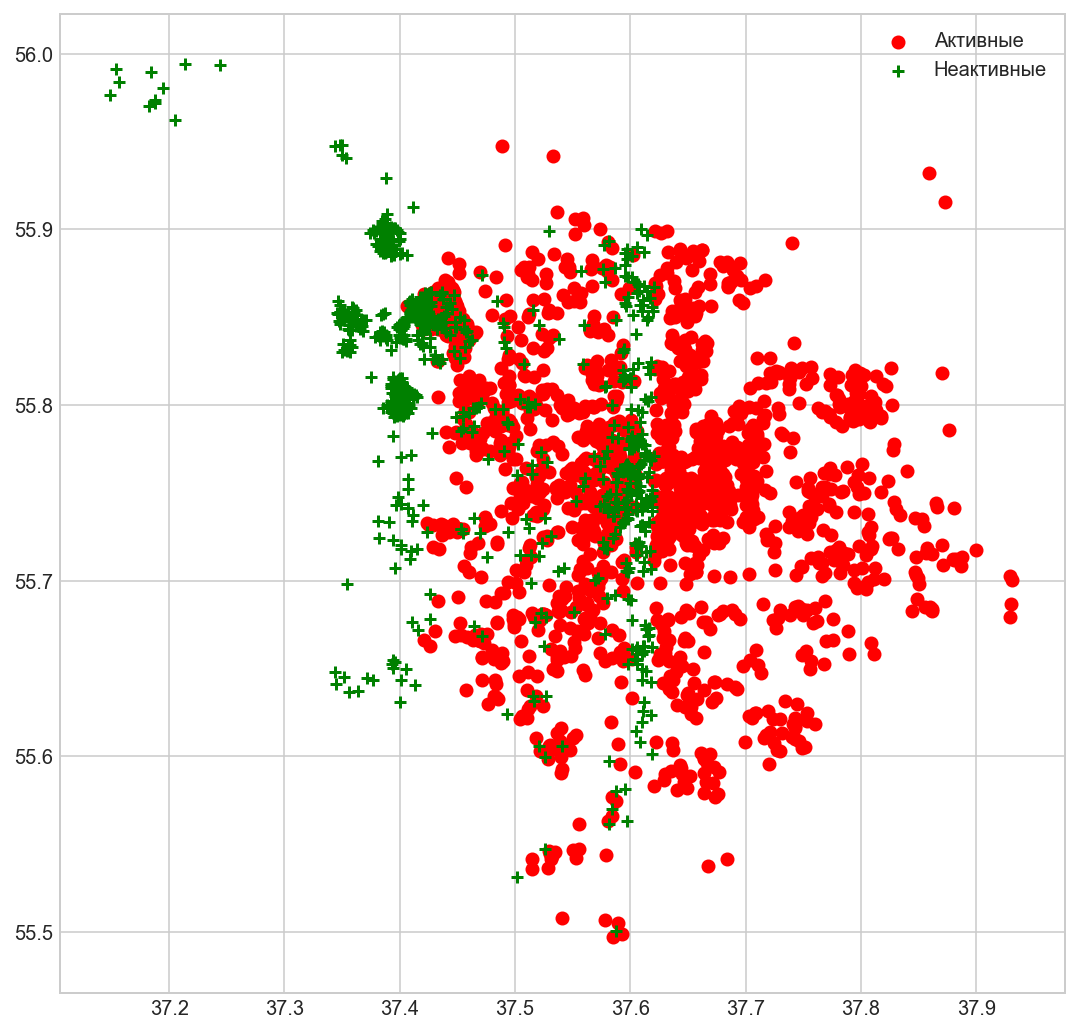

In [34]:
fig, axes = plt.subplots(1, figsize=(9, 9))
axes.scatter(temp4[temp4.srednya_aktivnost>0]['x'], temp4[temp4.srednya_aktivnost>0]['y'],c=['red'],marker ='o',alpha=1, label="Активные")
axes.scatter(temp4[temp4.srednya_aktivnost<=0]['x'], temp4[temp4.srednya_aktivnost<=0]['y'],c=['green'],marker ='+',alpha=1, label="Неактивные")
plt.legend()

Судя по картинке юго-запад хорошо голосует, восток. Какое-нибудь митиинои центр -наоборот плохо

## 5) для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [35]:
df.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  voices  
0  Во все разделы правил землепользования и застр...       1  
1  На основании вступившего в законную силу судеб...       1  
2  Внести в Проект правил землепользования и заст...       1  
3  Учитывая социальную значимость проекта строите...       1  
4  Учитывая социальную значимость проекта строите...       1

In [36]:
df.comment_class.value_counts()

-1    58552
 1    11830
Name: comment_class, dtype: int64

# Лемматизация слов

приведём все слова в текстах к начальной форме слова - так мы сильно сократим размерность пространства признаков

хоть pymorphy2 и достаточно быстрый, лучше его упаковывать в класс со своим кэшем (который хорошо бы ещё куда-то выгружать при окончании и загружать в начале работы, это можете доделать. Удобно для этих целей использовать json)

In [37]:
import pymorphy2
from nltk.tokenize import word_tokenize

In [43]:
class MorphProvider:
    def __init__(self):
        self.cache = {}
        self.morph = pymorphy2.MorphAnalyzer()
    
    def __call__(self, w):
        w = w.lower()
        cached = self.cache.get(w)
        if cached:
            return cached
        try:
            morphed = self.morph.parse(w)[0].normal_form
            self.cache[w] = morphed
            return morphed
        except:
            return None
    
    def morph_string(self, s):
        words = word_tokenize(s)
        return " ".join([self.__call__(w) for w in words])

In [44]:
morph = MorphProvider()

In [45]:
from tqdm import tqdm

In [46]:
df["normalized"] = [morph.morph_string(t) for t in tqdm(df.comment)]

100%|██████████| 70382/70382 [11:54<00:00, 98.47it/s]  


In [48]:
df.to_pickle('clusters.pkl')

In [49]:
df = pd.read_pickle('clusters.pkl')

In [50]:
from collections import Counter

In [51]:
df.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  voices  \
0  Во все разделы правил землепользования и застр...       1   
1  На основании вступившего в законную силу судеб...       1   
2  Внести в Проект правил землепользования и заст...       1   
3  Учитывая социальную значимость проекта строите...       1   
4  Учитывая социальную значимость проекта строите...       1   

                                          normalized  
0  в весь раздел правило землепользование и застр...  
1  на основание вступить в законный сила судебный...  
2  внести в проект правило землепользование и зас...  
3  учитывать социальный значимость проект строите...  
4  учитывать социальный значимость проект строите...

In [52]:
words = [w for w in " ".join(df.normalized).split() if len(w)>2]

In [53]:
df_za=df[df.comment_class==1]
df_protiv=df[df.comment_class!=1]

In [54]:
df_protiv.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  voices  \
0  Во все разделы правил землепользования и застр...       1   
1  На основании вступившего в законную силу судеб...       1   
2  Внести в Проект правил землепользования и заст...       1   
3  Учитывая социальную значимость проекта строите...       1   
4  Учитывая социальную значимость проекта строите...       1   

                                          normalized  
0  в весь раздел правило землепользование и застр...  
1  на основание вступить в законный сила судебный...  
2  внести в проект правило землепользование и зас...  
3  учитывать социальный значимость проект строите...  
4  учитывать социальный значимость проект строите...

In [56]:
Counter(words).most_common()[:20]

[('проект', 498817),
 ('москва', 469954),
 ('участок', 418679),
 ('застройка', 403944),
 ('зона', 351046),
 ('земельный', 338496),
 ('территория', 312924),
 ('город', 278557),
 ('объект', 272540),
 ('строительство', 266717),
 ('градостроительный', 261798),
 ('для', 233354),
 ('слушание', 224989),
 ('пзз', 218499),
 ('публичный', 211100),
 ('использование', 202302),
 ('землепользование', 200867),
 ('правило', 200132),
 ('вид', 192123),
 ('разрешить', 175119)]

In [16]:
#!pip install WordCloud

In [57]:
from wordcloud import WordCloud

def get_wordcloud(text,max_font_size=None):
    wordcloud = WordCloud(max_font_size=max_font_size).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

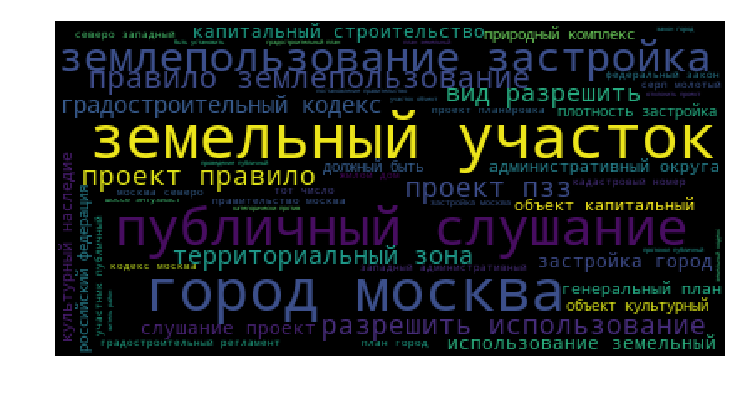

In [58]:
get_wordcloud(' '.join(words))

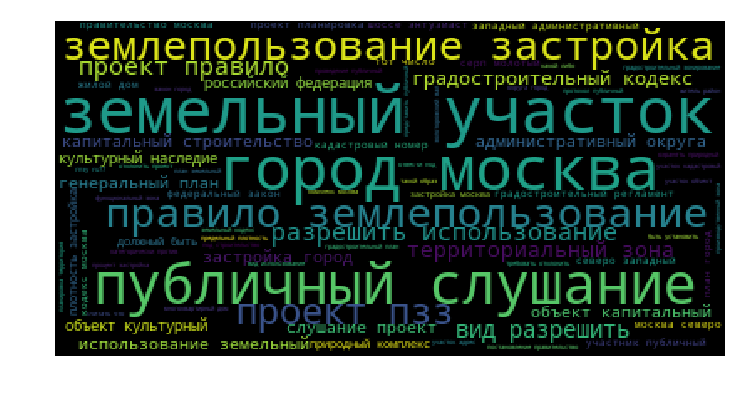

In [59]:
get_wordcloud(' '.join(words), max_font_size=50)

 Любоптыно, а есть ли разница в за и против

In [60]:
df_za=df[df.comment_class==1]
df_protiv=df[df.comment_class!=1]

In [61]:
words_za= [w for w in " ".join(df_za.normalized).split() if len(w)>2 ]
words_protiv= [w for w in " ".join(df_protiv.normalized).split() if len(w)>2 ]

In [62]:
cnter_za=Counter(words_za).most_common()

In [63]:
cnter_protiv=Counter(words_protiv).most_common()

In [64]:
cnt=1
for x in zip(cnter_za,cnter_protiv):
    if cnt<=20:
        print(cnt, x)
        cnt+=1
    else:
        break

1 (('проект', 42849), ('проект', 455968))
2 (('застройка', 28818), ('москва', 444345))
3 (('для', 26812), ('участок', 407169))
4 (('москва', 25609), ('застройка', 375126))
5 (('район', 25228), ('зона', 341971))
6 (('наш', 23912), ('земельный', 328901))
7 (('строительство', 21690), ('территория', 294261))
8 (('дом', 20760), ('объект', 268049))
9 (('город', 20683), ('градостроительный', 259875))
10 (('житель', 19288), ('город', 257874))
11 (('территория', 18663), ('строительство', 245027))
12 (('адрес', 18636), ('слушание', 216500))
13 (('так', 18424), ('пзз', 210777))
14 (('новое', 17240), ('для', 206542))
15 (('парковый', 17077), ('публичный', 202662))
16 (('землепользование', 17069), ('использование', 197358))
17 (('необходимый', 16963), ('вид', 189118))
18 (('правило', 16309), ('правило', 183823))
19 (('который', 13308), ('землепользование', 183798))
20 (('поддерживать', 13197), ('разрешить', 170981))


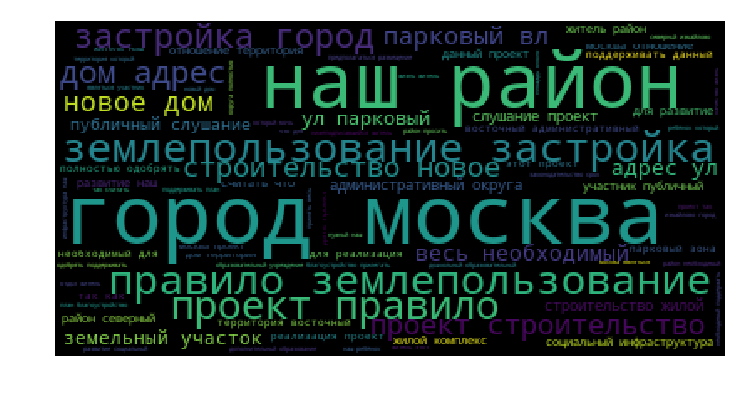

In [65]:
get_wordcloud(' '.join(words_za), max_font_size=50)

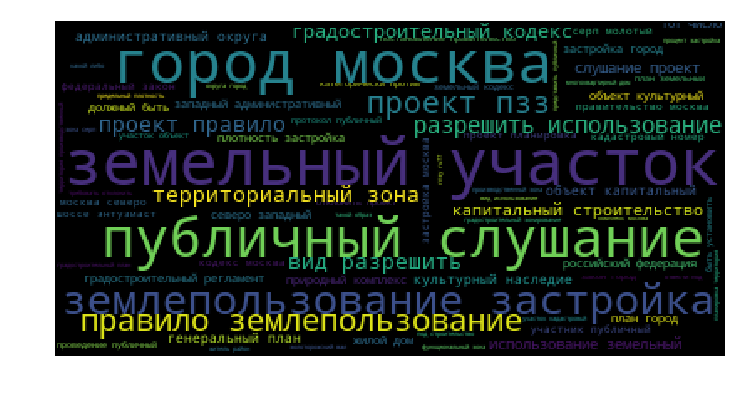

In [66]:
get_wordcloud(' '.join(words_protiv), max_font_size=50)

In [67]:
df["comment_class"] = df.comment_class.apply(lambda x: 1 if x==1 else 0)

## Попробуем научиться угадывать класс

Векторизуем тексты¶


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = CountVectorizer(max_features=5000)

In [70]:

%%time
X = vectorizer.fit_transform(df.normalized).toarray()

Wall time: 51.5 s


In [71]:
y = df.comment_class

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [76]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_params = {
    'criterion': ['gini'],
    'max_depth': [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='f1', cv=10,n_jobs=-1)
grid_tree.fit(X_train, y_train)

Wall time: 1h 50min 30s


In [77]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}
0.9708041267419147
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


AUC= 0.9835024416281939


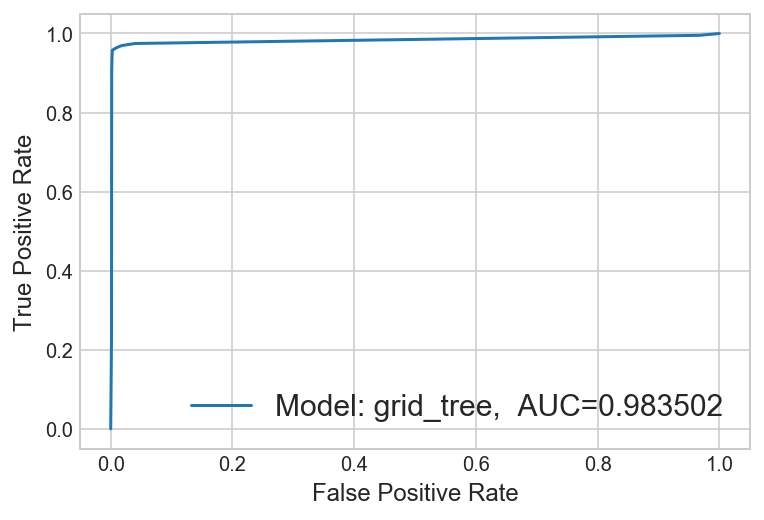

In [78]:
#  тут можно площадь под   ROC  -кривой посчитать.Весьма не плохо угадываем
from sklearn.metrics import auc, roc_curve, roc_auc_score
predictions_tree = grid_tree.predict_proba(X_test)
fpr_tree, tpr_tree, thres_tree = roc_curve( y_test, predictions_tree[:, 1] )

plt.plot( fpr_tree, tpr_tree, label= "Model: {},  AUC={:.6f}".format( 'grid_tree',roc_auc_score( y_test, predictions_tree[:, 1]),linestyle='--' ))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend( loc = 4, prop={'size': 15})
print('AUC=',roc_auc_score( y_test, predictions_tree[:, 1] ))